# Spatial joins
Often we want to add an attribute of a spatial object to another spatial object with which it shares a spatial relationship. For example an object is an element of layer A that contains the administrative regions of a country and the other object is an element of a layer B that contains the areas that are at risk of flooding. A polygon of layer B, that represents an area at risk of flooding, may have a topological relationship with one or more administrative regions. With a spatial join of the objects in the two layers that share a certain topological relationship we will be able to associate the risk of flood to the administrative regions. 

We start with a simple example of two datasets, a set of points of interest (POI) and a set of polygons that represents neighborhoods in New York City. We want to add the name of the neighborhood to the point that lies within it.

In [1]:
%matplotlib inline
from shapely.geometry import Point
from geopandas import datasets, GeoDataFrame, read_file

# NYC Boros
zippath = datasets.get_path('nybb')
neighborhoods_df = read_file(zippath)
neighborhoods_df

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


We create some POIs in the same area

In [3]:
b = [int(x) for x in neighborhoods_df.total_bounds]
N = 8
pois_df = GeoDataFrame([
    {'geometry': Point(x, y), 'value1': x + y, 'value2': x - y}
    for x, y in zip(range(b[0], b[2], int((b[2] - b[0]) / N)),
                    range(b[1], b[3], int((b[3] - b[1]) / N)))])

We assign to these points the same Coordinate Reference System of the neighborhoods

In [4]:
pois_df.crs = neighborhoods_df.crs
pois_df

,geometry,value1,value2
0,POINT (913175.000 120121.000),1033296,793054
1,POINT (932450.000 139211.000),1071661,793239
2,POINT (951725.000 158301.000),1110026,793424
3,POINT (971000.000 177391.000),1148391,793609
4,POINT (990275.000 196481.000),1186756,793794
5,POINT (1009550.000 215571.000),1225121,793979
6,POINT (1028825.000 234661.000),1263486,794164
7,POINT (1048100.000 253751.000),1301851,794349
8,POINT (1067375.000 272841.000),1340216,794534


(905464.6245788574, 1075092.8838439942, 112484.83531799316, 280480.45832214353)

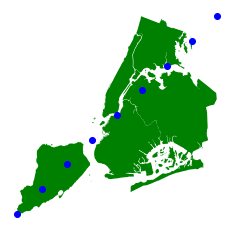

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
neighborhoods_df.plot(ax=ax, facecolor='green')
pois_df.plot(ax=ax, color='blue');
ax.axis('off')

Now we can create the spatial join between points and polygons based of their topological relationships. Between points and polygons two relationships are valid: $within$ and $contain$. We can add the information about the neighborhood where the POIs are located to the POIs dataset.

In [5]:
join_inner_df = pois_df.sjoin(neighborhoods_df, how="inner")[['geometry', 'value1', 'value2','BoroCode', 'BoroName']]
join_inner_df

,geometry,value1,value2,BoroCode,BoroName
1,POINT (932450.000 139211.000),1071661,793239,5,Staten Island
2,POINT (951725.000 158301.000),1110026,793424,5,Staten Island
5,POINT (1009550.000 215571.000),1225121,793979,4,Queens
6,POINT (1028825.000 234661.000),1263486,794164,2,Bronx


(905464.7390380859, 1075092.8783935546, 112485.76063504723, 280480.4142594267)

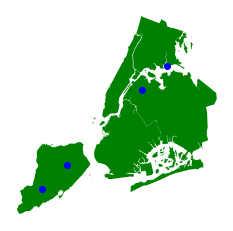

In [11]:
fig, ax = plt.subplots()
neighborhoods_df.plot(ax=ax, facecolor='green')
join_inner_df.plot(ax=ax, color='blue');
ax.axis('off')

## References
* [Intro to Python GIS](https://automating-gis-processes.github.io/CSC18/lessons/L4/spatial-join.html)
* [GeoPandas - Spatial Joins](https://geopandas.org/en/stable/gallery/spatial_joins.html)